### 批量梯度下降法
对梯度中的每个元素,使用了全部样本进行求解,所以叫做批量梯度下降法

### 随机梯度下降法
直接用某一个样本的梯度进行求解
优点是加快了求解的速度

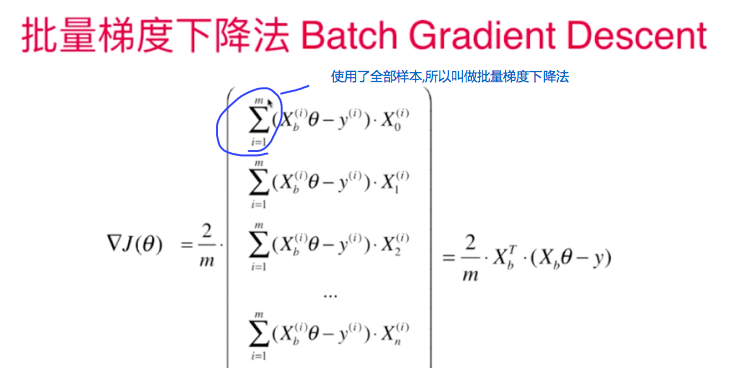

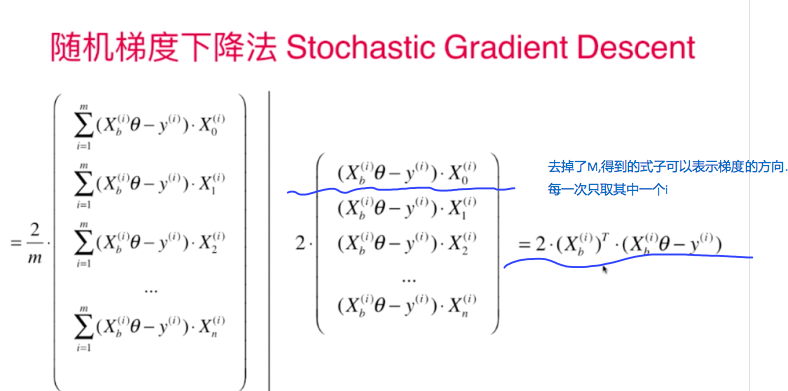

### 随机梯度下降法的学习率
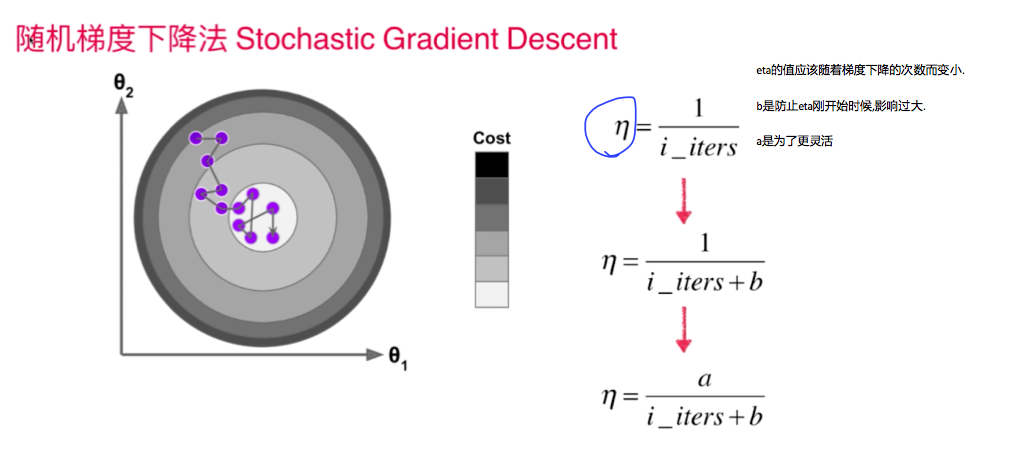

由于使用了单个样本求梯度,梯度下降并不会很规则,到了求解到目标点时,可能产生反向,所以通过降低学习率去控制.

a,b是采用"模拟退火"的思路,b是为了防止开始时,eta过大,a是为了更加灵活.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 先看批量梯度下降法

In [3]:
m = 100000

x = np.random.normal(size = m)
X = x.reshape(-1,1)
y = 4.*x + 3.+ np.random.normal(0,3,size = m)

In [4]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    #使用try except 防止损失函数太大
    except:
        return float('inf')
    

In [5]:
def dJ(theta, X_b, y):
    # res = np.empty(len(theta))
    # res[0] = np.sum(X_b.dot(theta) - y)
    # for i in range(1, len(theta)):
    #     res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    # return res * 2 / len(X_b)
    #使用向量化计算
    return X_b.T.dot(X_b.dot(theta) - y) *2.  /len(X_b)

In [6]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters = 1e4,epsilon = 1e-8):

	theta = initial_theta
	#梯度下降当前的次数
	i_iter = 0 
	#由于theta是矩阵,注释掉
	#theta_history.append(initial_theta)

	while i_iter < n_iters:
		gradient = dJ(theta,X_b,y)
		last_theta = theta
		theta = theta - eta * gradient
		#由于theta是矩阵,注释掉
		#theta_history.append(theta)

		if(abs(J(theta,X_b,y)- J(last_theta,X_b,y)) < epsilon):
			break

		i_iter += 1

	return theta

In [7]:
%%time
X_b = np.hstack([np.ones((len(X),1)),x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.1
theta = gradient_descent(X_b,y,initial_theta,eta)

CPU times: user 290 ms, sys: 25 ms, total: 315 ms
Wall time: 232 ms


In [8]:
theta

array([ 2.98805968,  3.99072563])

## 随机梯度下降法

In [9]:
def dJ_sgd(theta,X_b_i,y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

In [10]:
def sgd(X_b,y,initial_theta,n_iters):

	#绘制学习率,使用模拟退火
	t0 = 5
	t1 = 50

	def learning_rate(t):
		return t0 / (t + t1)

	theta = initial_theta
	for cur_iter in range (n_iters):
		# 随机选择一个样本
		rand_i = np.random.randint(len(X_b))
		# 传入刚才选择的随机样本
		gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i])
		theta = theta - learning_rate(cur_iter) * gradient
        #梯度差并不是递减,所以没有abs

	return theta


In [11]:
%%time
X_b = np.hstack([np.ones((len(X),1)),x.reshape(-1,1)])
#初始化theta,为X_b的特征数
initial_theta = np.zeros(X_b.shape[1])
eta = 0.1
theta = sgd(X_b,y,initial_theta,n_iters = len(X_b)//3)

CPU times: user 286 ms, sys: 5.59 ms, total: 292 ms
Wall time: 300 ms


In [12]:
theta

array([ 2.95841912,  4.00120154])